In [6]:
pip install tensorflow

  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached google_auth-1.28.0-py2.py3-none-any.whl (136 kB)
  Using cached google_auth_oauthlib-0.4.3-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached cachetools-4.2.1-py3-none-any.whl (12 kB)
  Using cached rsa

# IMPORT NECESSARY PACKAGES 

In [7]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

# LOAD MNIST DATASET INTO KERAS

In [8]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()


11493376/11490434 [==============================] - 2s 0us/step


### ANALYSING THE DATASET

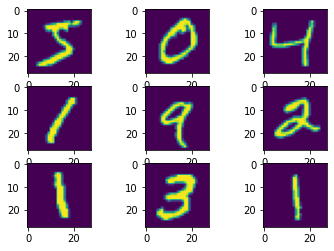

In [9]:
 for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(training_images[i])

In [10]:
print(training_images.shape)
print(training_images[100])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 13

Above we can see that pixel ranges from 0 to 255

# BUILD THE NETWORK

The network bolow is built with 1 input layer, 1 hidden layer with 128 neurons and 1 output layer with 10 neurons

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# RESHAPE IMAGE ARRAY INTO [0,1] INTERVAL (normalization)

In [12]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [14]:
print(training_images[100])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# DEFINE COMPILER PARAMETERS LIKE OPTIMIZER AND METRICS

In [15]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# FEED THE DATA TO OUR NETWORK AND TRAIN

In [16]:
model.fit(training_images, training_labels, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4393 - accuracy: 0.8734
Epoch 2/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1229 - accuracy: 0.9629
Epoch 3/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0850 - accuracy: 0.9740
Epoch 4/7
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0585 - accuracy: 0.9821
Epoch 5/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0449 - accuracy: 0.9870
Epoch 6/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0341 - accuracy: 0.9901
Epoch 7/7
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0278 - accuracy: 0.9914


# TEST THE PERFORMANCE WITH TEST IMAGE

In [17]:
print(model.evaluate(test_images,test_labels))


313/313 [==============================] - 2s 4ms/step - loss: 0.0756 - accuracy: 0.9785
[0.07561788707971573, 0.9785000085830688]


Accuracy 97.85%

### Visualizing our prediction using some sample test images

In [32]:
from matplotlib.pyplot import imshow, show  

6


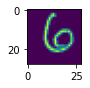

0


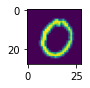

5


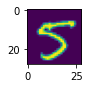

4


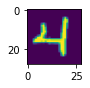

9


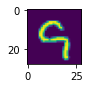

9


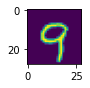

2


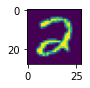

1


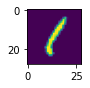

9


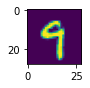

4


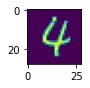

In [36]:
prediction=model.predict(test_images)
for i in range(100,110):
    print(np.argmax(prediction[i]))
    plt.figure(figsize = (10,1))
    plt.imshow(test_images[i])
    show()